* NOTEBOOK: 02_data_analysis.ipynb

* DESCRIPTION: Advanced Exploratory Data      Analysis (EDA)


# 1. LOAD THE DATASET 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings

# Suppress annoying warnings for clean presentation
warnings.filterwarnings("ignore")

try:
    # Load the raw data to visualize patterns
    df = pd.read_csv('../data/medical_insurance_data.csv')
    print("Data Loaded Successfully!")
except FileNotFoundError:
    print("Error: File not found! Please check the 'data' folder.")


Data Loaded Successfully!


# 2. HANDLE MISSING VALUES (For Visualization Only)

In [13]:
# We drop rows with missing values to ensure graphs are clean and accurate.
df_clean = df.dropna().copy()
print(f"Original Rows: {df.shape[0]}")
print(f"Rows used for Analysis: {df_clean.shape[0]} (Removed missing values)")

# Set the visual style for the graphs
sns.set(style="whitegrid")

Original Rows: 2772
Rows used for Analysis: 2736 (Removed missing values)


# SECTION A: DATA DISTRIBUTIONS (Understanding the Population)

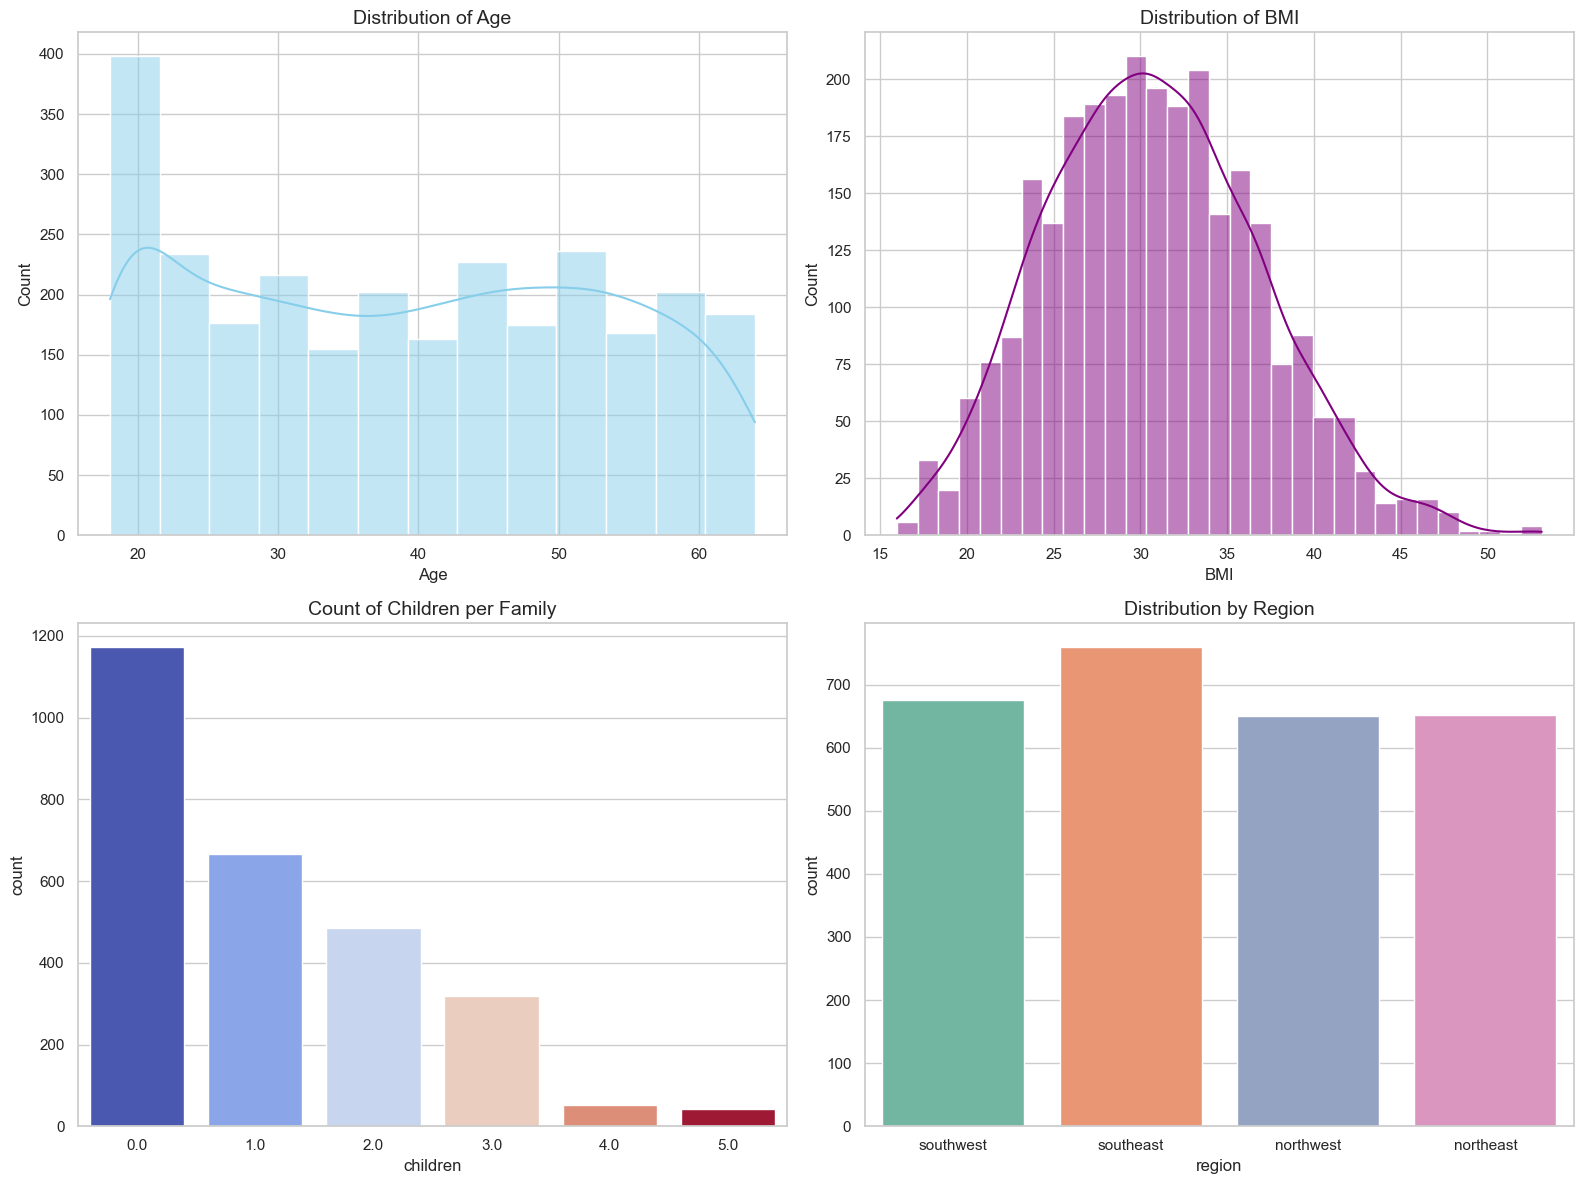

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Graph 1: Age Distribution
sns.histplot(df_clean['age'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=14)
axes[0, 0].set_xlabel('Age')

# Graph 2: BMI Distribution
sns.histplot(df_clean['bmi'], kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI', fontsize=14)
axes[0, 1].set_xlabel('BMI')

# Graph 3: Children Count (FIXED)
# Added hue='children' and legend=False
sns.countplot(x='children', data=df_clean, hue='children', legend=False, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Count of Children per Family', fontsize=14)

# Graph 4: Region Distribution (FIXED)
# Added hue='region' and legend=False
sns.countplot(x='region', data=df_clean, hue='region', legend=False, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Distribution by Region', fontsize=14)

plt.tight_layout()
plt.show()

# SECTION B: ADVANCED ANALYSIS (Finding Relationships)

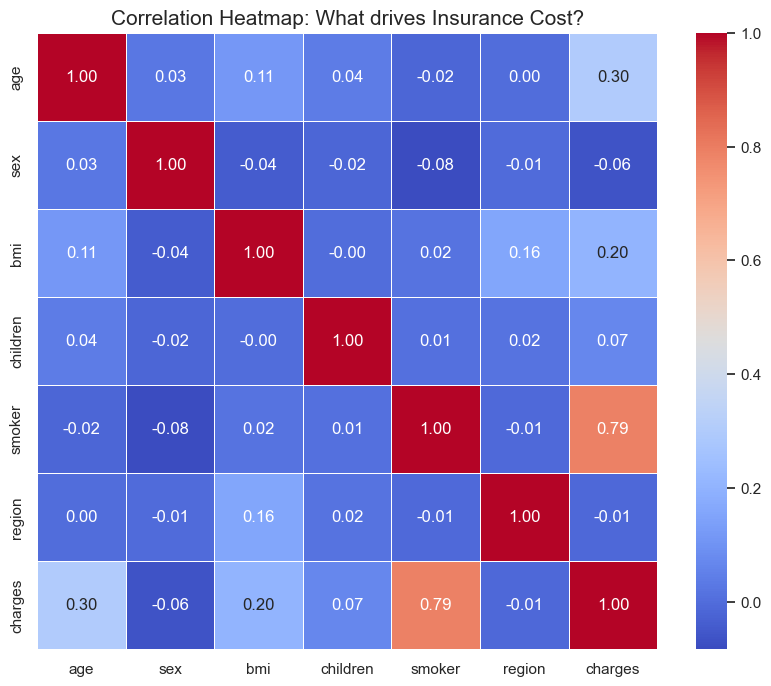

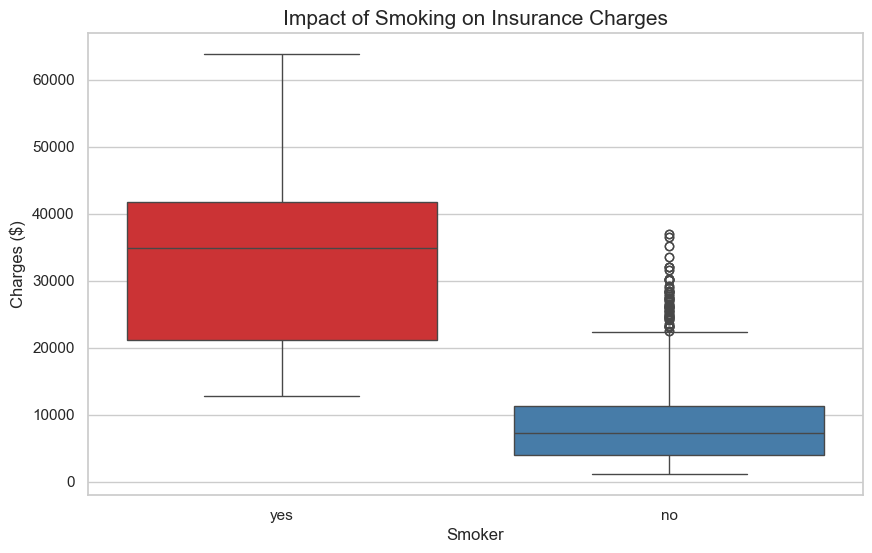

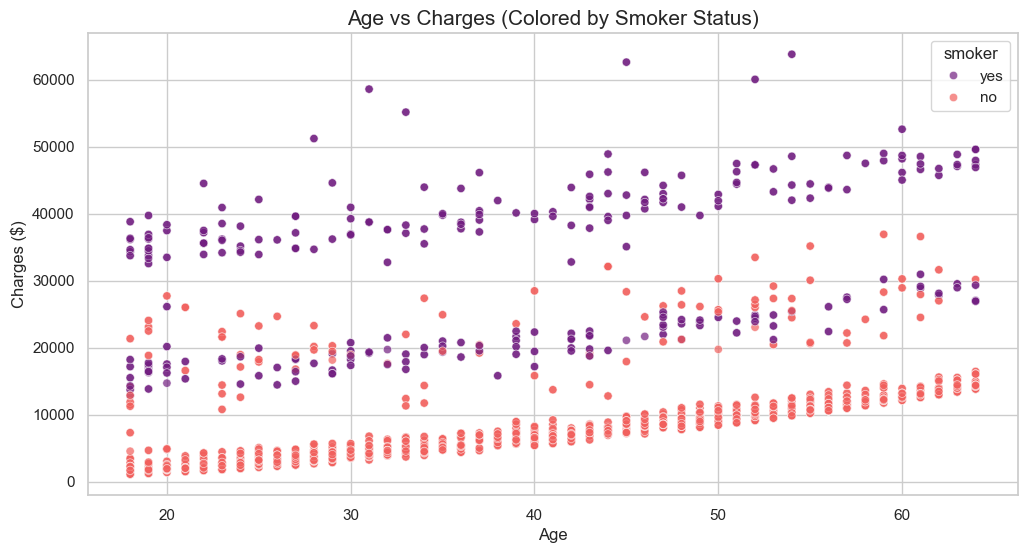

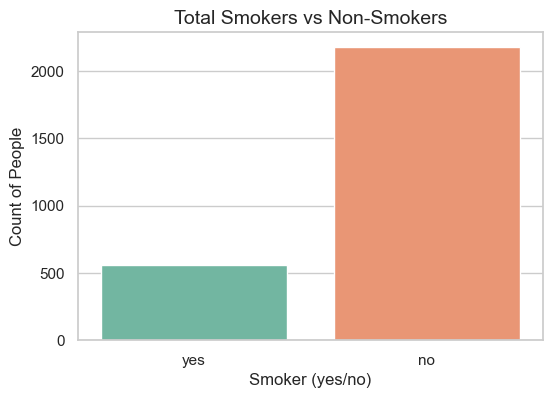

In [14]:
# GRAPH 5: CORRELATION HEATMAP

# # This graph shows which features impact the 'Charges' the most.
# We temporarily convert text to numbers for this calculation.

df_encoded = df_clean.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['region'] = df_encoded['region'].astype('category').cat.codes

plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: What drives Insurance Cost?', fontsize=15)
plt.show()

# GRAPH 6: SMOKER VS CHARGES (Box Plot) (FIXED)
# Added hue='smoker' and legend=False
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df_clean, hue='smoker', legend=False, palette='Set1')
plt.title('Impact of Smoking on Insurance Charges', fontsize=15)
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.show()

# GRAPH 7: AGE VS CHARGES (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df_clean, palette='magma', alpha=0.7)
plt.title('Age vs Charges (Colored by Smoker Status)', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

# GRAPH 8: Smoker Count (FIXED)
# Added hue='smoker' and legend=False
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df_clean, hue='smoker', legend=False, palette='Set2')
plt.title('Total Smokers vs Non-Smokers', fontsize=14)
plt.xlabel('Smoker (yes/no)')
plt.ylabel('Count of People')
plt.show()